resources regarding IBI: https://support.mindwaretech.com/2017/09/all-about-hrv-part-2-interbeat-intervals-and-time-domain-stats/
TL;DR: Basically the number of milliseconds (typically) between heartbeat peaks

In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

*IBI Data
Validity:
There are 7 values that occur in validity; 0,1,2,3,15,-1, and -2. What do these levels represent, and what is their relation to IBI or padded IBI?

Validity numbers should be 1, 2 or 3. Other numbers may represent some random situations (resetting, before first firmware update, ...)
- 1 - most probably valid
- 2 - most probably erratic, could not be corrected by our automatic filters
- 3 - most probably erratic, but this on was corrected by our automatic filters


In [2]:
ibi_data = pd.read_csv('scripps1_ibi.csv',sep=';')

In [3]:
ibi_data.head()

,Date,Time,Validity,Padded IBI,IBI,UTC time
0,27.11.2018,12:37:43,0,1312,1312.0,1.543351e+09
1,27.11.2018,12:37:43,1,980,980.0,1.543351e+09
2,27.11.2018,12:37:43,1,956,956.0,1.543351e+09
3,27.11.2018,12:37:43,1,1096,1096.0,1.543351e+09
4,27.11.2018,12:37:43,1,1172,1172.0,1.543351e+09


In [223]:
ibi_data['Time'][0]

'12:37:43'

In [4]:
ibi_data.groupby('Validity').describe()

Padded IBI                                                  \
              count          mean           std      min        25%   
Validity                                                              
-2            139.0  6.375540e+04  3.111088e+03  61000.0    61000.0   
-1             96.0  8.113708e+06  9.996774e+06  32000.0  1039250.0   
 0           1624.0  1.003044e+03  2.529165e+02    352.0      904.0   
 1         410655.0  1.029646e+03  1.285584e+02    324.0      960.0   
 2          57849.0  8.107281e+02  4.690860e+02      0.0      456.0   
 3          19573.0  8.951609e+02  2.665723e+02      0.0      713.0   
 15           147.0  0.000000e+00  0.000000e+00      0.0        0.0   

                                                  IBI               ...  \
                50%         75%         max     count         mean  ...   
Validity                                                            ...   
-2          63000.0     65000.0     80000.0       0.0          NaN  ...   
-1        4465000.0  12371750.0  50074000.0       0.0          NaN  ...   
 0           1000.0      1100.0      2000.0    1624.0  1003.044335  ...   
 1           1028.0      1108.0      1968.0  410655.0  1029.646380  ...   
 2            652.0       984.0      2000.0   57849.0   810.728051  ...   
 3            921.0      1053.0      2000.0   19573.0   895.160936  ...   
 15             0.0         0.0         0.0     147.0     0.000000  ...   

                          UTC time                                             \
             75%     max     count          mean            std           min   
Validity                                                                        
-2           NaN     NaN       0.0           NaN            NaN           NaN   
-1           NaN     NaN       0.0           NaN            NaN           NaN   
 0        1100.0  2000.0    1624.0  1.543980e+09  380547.974488  1.543351e+09   
 1        1108.0  1968.0  410655.0  1.543979e+09  380286.864009  1.543351e+09   
 2         984.0  2000.0   57849.0  1.544005e+09  370459.142376  1.543351e+09   
 3        1053.0  2000.0   19573.0  1.543996e+09  370679.799521  1.543351e+09   
 15          0.0     0.0     147.0  1.544026e+09  368545.820735  1.543382e+09   

                                                                  
                   25%           50%           75%           max  
Validity                                                          
-2                 NaN           NaN           NaN           NaN  
-1                 NaN           NaN           NaN           NaN  
 0        1.543654e+09  1.543933e+09  1.544302e+09  1.544629e+09  
 1        1.543656e+09  1.543993e+09  1.544282e+09  1.544629e+09  
 2        1.543680e+09  1.544030e+09  1.544344e+09  1.544629e+09  
 3        1.543680e+09  1.543999e+09  1.544348e+09  1.544629e+09  
 15       1.543760e+09  1.544046e+09  1.544362e+09  1.544629e+09  

[7 rows x 24 columns]

In [9]:
'''
The only valid IBI's are really 1, 2, and 3. It seems that 0 might possibly also have valid information since it 
doesn't vary much from 1. However, knowing this new information about what validity represents, I'll go ahead and 
group -2, -1, 0, and 15 as invalid results. I may potentially bring 0 out of the invalid group. 
'''
valid_data = ibi_data[(ibi_data['Validity']==1)|(ibi_data['Validity']==2)|(ibi_data['Validity']==3)]
invalid_data = ibi_data[(ibi_data['Validity']==0)|(ibi_data['Validity']==-1)|(ibi_data['Validity']==-2)|(ibi_data['Validity']==15)]

In [18]:
# 0.004093184215734885 of the data is invalid. For the most time, IBI is measured surprisingly well
invalid_data.shape[0]/(valid_data.shape[0]+invalid_data.shape[0])

0.004093184215734885

In [29]:
# unique dates, takes measurements every single day 
ibi_data['Date'].unique()

array(['27.11.2018', '28.11.2018', '29.11.2018', '30.11.2018',
       '1.12.2018', '2.12.2018', '3.12.2018', '4.12.2018', '5.12.2018',
       '6.12.2018', '7.12.2018', '8.12.2018', '9.12.2018', '10.12.2018',
       '11.12.2018', '12.12.2018'], dtype=object)

In [32]:
# there are different counts of measurements during each time interval. When are items measured? 
ibi_data.groupby('Date')['Time'].count()

Date
1.12.2018     30942
10.12.2018    28912
11.12.2018    30259
12.12.2018    26342
2.12.2018     39596
27.11.2018     7558
28.11.2018    40900
29.11.2018    34504
3.12.2018     31276
30.11.2018    32721
4.12.2018     28532
5.12.2018     35425
6.12.2018     34447
7.12.2018     24699
8.12.2018     27229
9.12.2018     36741
Name: Time, dtype: int64

In [214]:
test_dataset.head()['Validity'].mean()

0.8

In [215]:
#for 
test_dataset = ibi_data[(ibi_data['Date']==ibi_data['Date'].unique()[0])]
times = []
num_measurements = [] 
validities_ave = [] 
for x in test_dataset['Time'].unique():
    times.append(x)
    num_measurements.append(test_dataset[test_dataset['Time']==x].shape[0])
    validities_ave.append(test_dataset[test_dataset['Time']==x]['Validity'].mean())
datetime_measurements_1 = pd.DataFrame({'Times':times,'Number Measurements':num_measurements,'Validity Averages':
                                       validities_ave})
datetime_measurements_1['Times'] = pd.to_datetime(datetime_measurements_1['Times'])

In [216]:
datetime_measurements_1.diff()['Times']

0           NaT
1      00:00:07
2      00:00:06
3      00:00:06
4      00:00:06
5      00:00:06
6      00:00:11
7      00:00:07
8      00:00:06
9      00:00:06
10     00:00:06
11     00:00:06
12     00:00:06
13     00:00:06
14     00:00:07
15     00:00:05
16     00:00:06
17     00:00:12
18     00:00:06
19     00:00:06
20     00:00:06
21     00:00:06
22     00:00:06
23     00:00:07
24     00:00:06
25     00:00:05
26     00:00:09
27     00:00:04
28     00:00:05
29     00:00:05
         ...   
1156   00:00:06
1157   00:00:06
1158   00:00:06
1159   00:00:07
1160   00:00:07
1161   00:00:06
1162   00:00:06
1163   00:00:06
1164   00:00:06
1165   00:00:07
1166   00:00:06
1167   00:00:07
1168   00:00:06
1169   00:00:06
1170   00:00:06
1171   00:00:06
1172   00:00:06
1173   00:00:06
1174   00:00:07
1175   00:00:06
1176   00:00:06
1177   00:00:06
1178   00:00:06
1179   00:00:07
1180   00:00:07
1181   00:00:06
1182   00:00:06
1183   00:00:07
1184   00:00:07
1185   00:00:07
Name: Times, Length: 118

In [219]:
datetime_measurements_1.head()

,Times,Number Measurements,Validity Averages
0,2019-07-10 12:37:43,6,0.833333
1,2019-07-10 12:37:50,6,1.000000
2,2019-07-10 12:37:56,6,1.000000
3,2019-07-10 12:38:02,6,1.000000
4,2019-07-10 12:38:08,6,1.000000


In [218]:
datetime_measurements_1['Number Measurements'].unique()

array([ 6, 12, 18,  1])

times vary significantly. It seems that there's an attempt to measure every 6 seconds, but sometimes it varies 

## Are there any reasons why some IBI's are measured incorrectly? Can we find any patterns, and therefor come up with preventative measures? 

In [20]:
invalid_data.groupby('Validity').describe().T

Validity                   -2            -1             0             15
Padded IBI count    139.000000  9.600000e+01  1.624000e+03  1.470000e+02
           mean   63755.395683  8.113708e+06  1.003044e+03  0.000000e+00
           std     3111.087527  9.996774e+06  2.529165e+02  0.000000e+00
           min    61000.000000  3.200000e+04  3.520000e+02  0.000000e+00
           25%    61000.000000  1.039250e+06  9.040000e+02  0.000000e+00
           50%    63000.000000  4.465000e+06  1.000000e+03  0.000000e+00
           75%    65000.000000  1.237175e+07  1.100000e+03  0.000000e+00
           max    80000.000000  5.007400e+07  2.000000e+03  0.000000e+00
IBI        count      0.000000  0.000000e+00  1.624000e+03  1.470000e+02
           mean            NaN           NaN  1.003044e+03  0.000000e+00
           std             NaN           NaN  2.529165e+02  0.000000e+00
           min             NaN           NaN  3.520000e+02  0.000000e+00
           25%             NaN           NaN  9.040000e+02  0.000000e+00
           50%             NaN           NaN  1.000000e+03  0.000000e+00
           75%             NaN           NaN  1.100000e+03  0.000000e+00
           max             NaN           NaN  2.000000e+03  0.000000e+00
UTC time   count      0.000000  0.000000e+00  1.624000e+03  1.470000e+02
           mean            NaN           NaN  1.543980e+09  1.544026e+09
           std             NaN           NaN  3.805480e+05  3.685458e+05
           min             NaN           NaN  1.543351e+09  1.543382e+09
           25%             NaN           NaN  1.543654e+09  1.543760e+09
           50%             NaN           NaN  1.543933e+09  1.544046e+09
           75%             NaN           NaN  1.544302e+09  1.544362e+09
           max             NaN           NaN  1.544629e+09  1.544629e+09

## How much of the valid data is the most valid? Make some comparisons between the three validity groups, maybe find some connections to what makes certain values more valid or not 

In [56]:
valid_data.head()

,Date,Time,Validity,Padded IBI,IBI,UTC time
1,27.11.2018,12:37:43,1,980,980.0,1.543351e+09
2,27.11.2018,12:37:43,1,956,956.0,1.543351e+09
3,27.11.2018,12:37:43,1,1096,1096.0,1.543351e+09
4,27.11.2018,12:37:43,1,1172,1172.0,1.543351e+09
5,27.11.2018,12:37:43,1,1080,1080.0,1.543351e+09


In [206]:
len(valid_data)

488077

In [61]:
# as suspected, the padded IBI and IBI are the same (since these are valid data points)
(valid_data['IBI']-valid_data['Padded IBI']).unique()

array([0.])

In [62]:
# cleaning some of the data; UTC time covers both Date and Time, and Padded IBI and IBI are the same 
valid_data = ibi_data[(ibi_data['Validity']==1)|(ibi_data['Validity']==2)|(ibi_data['Validity']==3)]
valid_data_v2 = valid_data[['Validity','Padded IBI','UTC time']]

In [63]:
valid_data_v2.head()

,Validity,Padded IBI,UTC time
1,1,980,1.543351e+09
2,1,956,1.543351e+09
3,1,1096,1.543351e+09
4,1,1172,1.543351e+09
5,1,1080,1.543351e+09


In [65]:
# it's a good thing that most of the data is valid (1). Description holds true; (2) was most inaccurate (due to 
# inability to correct it) and (3) is second most accurate (least variance)
valid_data_v2.groupby('Validity').describe().T

Validity                     1             2             3
Padded IBI count  4.106550e+05  5.784900e+04  1.957300e+04
           mean   1.029646e+03  8.107281e+02  8.951609e+02
           std    1.285584e+02  4.690860e+02  2.665723e+02
           min    3.240000e+02  0.000000e+00  0.000000e+00
           25%    9.600000e+02  4.560000e+02  7.130000e+02
           50%    1.028000e+03  6.520000e+02  9.210000e+02
           75%    1.108000e+03  9.840000e+02  1.053000e+03
           max    1.968000e+03  2.000000e+03  2.000000e+03
UTC time   count  4.106550e+05  5.784900e+04  1.957300e+04
           mean   1.543979e+09  1.544005e+09  1.543996e+09
           std    3.802869e+05  3.704591e+05  3.706798e+05
           min    1.543351e+09  1.543351e+09  1.543351e+09
           25%    1.543656e+09  1.543680e+09  1.543680e+09
           50%    1.543993e+09  1.544030e+09  1.543999e+09
           75%    1.544282e+09  1.544344e+09  1.544348e+09
           max    1.544629e+09  1.544629e+09  1.544629e+09

Time doesn't seem to be a factor to validity. In general, mean and standard deviation for UTC is similar, most likely symbolizing that time isn't a determining factor for validity. As a result, I decided to do some digging in averaging the values for each UTC time.

In [68]:
valid_data_summary = valid_data_v2.groupby('UTC time').mean().reset_index()
valid_data_summary.head()

,UTC time,Validity,Padded IBI
0,1.543351e+09,1.0,980.0
1,1.543351e+09,1.0,956.0
2,1.543351e+09,1.0,1096.0
3,1.543351e+09,1.0,1172.0
4,1.543351e+09,1.0,1080.0


In [207]:
len(valid_data_summary)

420399

In [69]:
# shows that there are some variances 
valid_data_summary['Validity'].unique()

array([1.        , 2.        , 3.        , 1.5       , 1.33333333,
       1.83333333, 1.66666667, 1.75      , 2.5       , 2.33333333,
       1.25      , 2.66666667, 1.8       , 2.2       , 1.6       ,
       1.4       , 1.2       , 2.25      , 2.75      , 2.4       ,
       2.16666667, 1.85714286, 1.71428571, 2.6       , 1.88888889,
       2.14285714, 1.57142857, 1.28571429, 1.22222222, 1.875     ,
       1.125     , 1.42857143, 1.375     , 1.55555556, 1.91666667,
       2.05      , 2.28571429, 1.14285714, 1.16666667])

In [82]:
valid_data_summary = valid_data_v2.groupby('UTC time').mean().reset_index()
valid_data_summary['Validity'] = valid_data_summary['Validity'].round()
valid_data_summary.head()

,UTC time,Validity,Padded IBI
0,1.543351e+09,1.0,980.0
1,1.543351e+09,1.0,956.0
2,1.543351e+09,1.0,1096.0
3,1.543351e+09,1.0,1172.0
4,1.543351e+09,1.0,1080.0


In [76]:
valid_data = ibi_data[(ibi_data['Validity']==1)|(ibi_data['Validity']==2)|(ibi_data['Validity']==3)]
valid_data_v2 = valid_data[['Validity','Padded IBI','UTC time']]
valid_data_summary = valid_data_v2.groupby('UTC time').mean().reset_index()
valid_data_summary['Validity'] = valid_data_summary['Validity'].round()
valid_1 = valid_data_v2[valid_data_v2['Validity']==1]
valid_2 = valid_data_v2[valid_data_v2['Validity']==2]
valid_3 = valid_data_v2[valid_data_v2['Validity']==3]

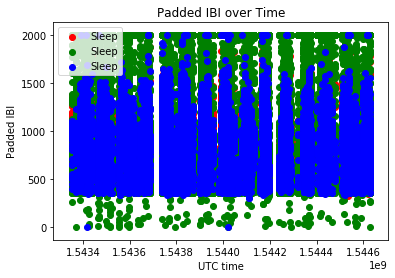

In [77]:
f, ax = plt.subplots()
ax.scatter('UTC time', 'Padded IBI', data = valid_1,color='r',label='Sleep')
ax.scatter('UTC time', 'Padded IBI', data = valid_2,color='g',label='Sleep')
ax.scatter('UTC time', 'Padded IBI', data = valid_3,color='b',label='Sleep')
ax.set_ylabel('Padded IBI')
ax.set_xlabel('UTC time')
ax.set_title('Padded IBI over Time')
leg = ax.legend();

In [83]:
valid_data = ibi_data[(ibi_data['Validity']==1)|(ibi_data['Validity']==2)|(ibi_data['Validity']==3)]
valid_data_v2 = valid_data[['Validity','Padded IBI','UTC time']]
valid_data_summary = valid_data_v2.groupby('UTC time').mean().reset_index()
valid_data_summary['Validity'] = valid_data_summary['Validity'].round()
valid_sum_1 = valid_data_summary[valid_data_summary['Validity']==1]
valid_sum_2 = valid_data_summary[valid_data_summary['Validity']==2]
valid_sum_3 = valid_data_summary[valid_data_summary['Validity']==3]

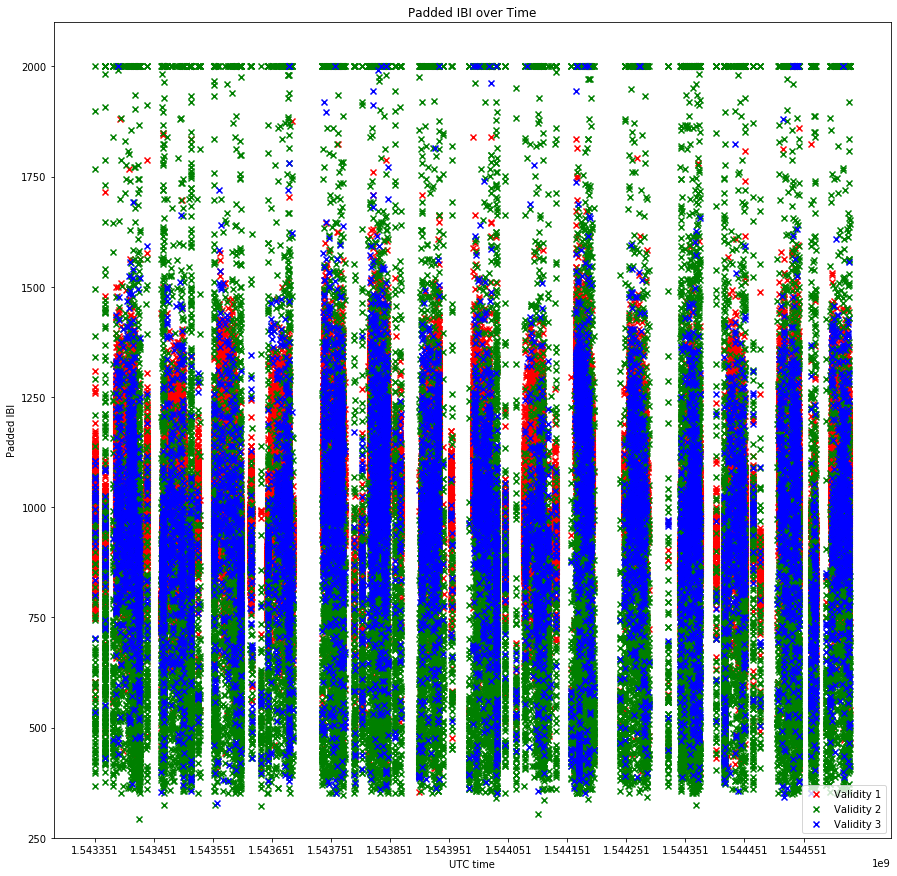

In [220]:
# shouldn't there be less data points? Go back and check
valid_data = ibi_data[(ibi_data['Validity']==1)|(ibi_data['Validity']==2)|(ibi_data['Validity']==3)]
valid_data_v2 = valid_data[['Validity','Padded IBI','UTC time']]
valid_data_summary = valid_data_v2.groupby('UTC time').mean().reset_index()
valid_data_summary['Validity'] = valid_data_summary['Validity'].round()
valid_sum_1 = valid_data_summary[valid_data_summary['Validity']==1]
valid_sum_2 = valid_data_summary[valid_data_summary['Validity']==2]
valid_sum_3 = valid_data_summary[valid_data_summary['Validity']==3]
f, ax = plt.subplots(figsize=(15,15))
ax.scatter('UTC time', 'Padded IBI', data = valid_sum_1,color='r',label='Validity 1',marker='x',linewidths=.1)
ax.scatter('UTC time', 'Padded IBI', data = valid_sum_2,color='g',label='Validity 2',marker='x',linewidths=.1)
ax.scatter('UTC time', 'Padded IBI', data = valid_sum_3,color='b',label='Validity 3',marker='x',linewidths=.1)
plt.xticks(np.arange(1543351058, 1544628851, 100000.0))
ax.set_ylim([250,2100])
ax.set_ylabel('Padded IBI')
ax.set_xlabel('UTC time')
ax.set_title('Padded IBI over Time')
leg = ax.legend();

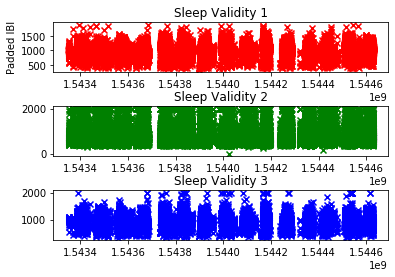

In [222]:
plt.subplot(3, 1, 1)
plt.scatter('UTC time', 'Padded IBI', data = valid_sum_1,color='r',label='Sleep',marker='x',linewidths=.1)
plt.title('Sleep Validity 1')
plt.ylabel('Padded IBI')

plt.subplot(3, 1, 2)
plt.scatter('UTC time', 'Padded IBI', data = valid_sum_2,color='g',label='Sleep',marker='x',linewidths=.1)
plt.title('Sleep Validity 2')

plt.subplot(3,1,3)
plt.scatter('UTC time', 'Padded IBI', data = valid_sum_3,color='b',label='Sleep',marker='x',linewidths=.1)
plt.title('Sleep Validity 3')

plt.subplots_adjust(hspace = 0.7)

plt.show()

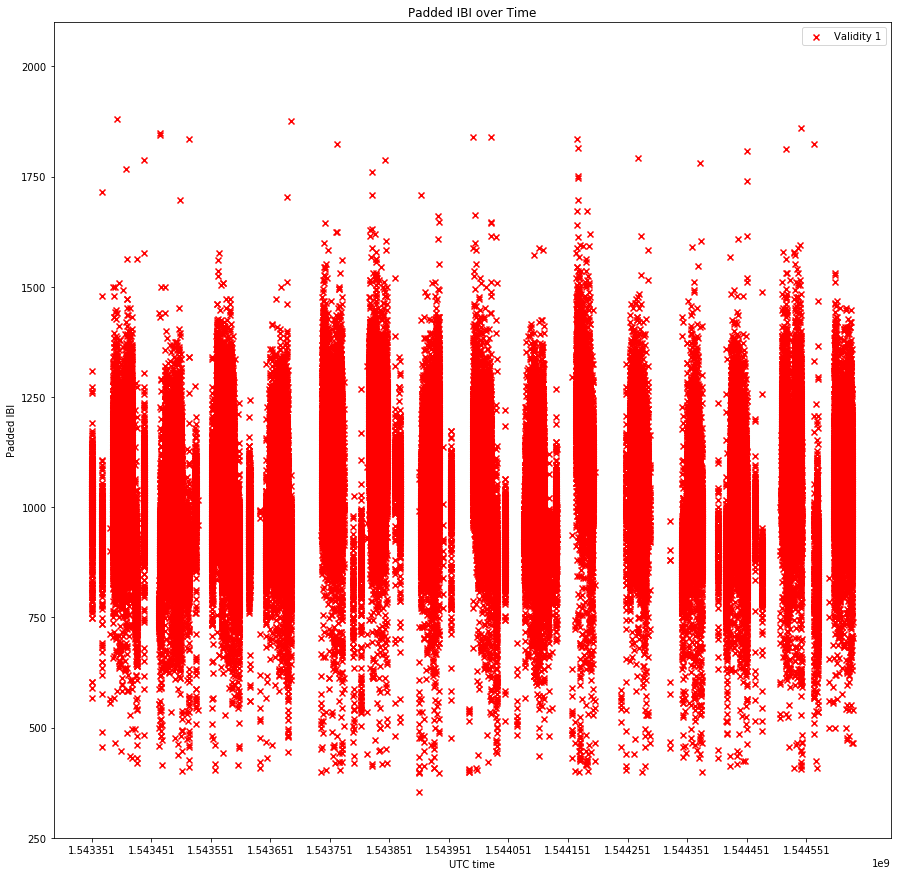

In [140]:
# if you only cared about the most valid IBI's (which you could, since a majority are 1's)
f, ax = plt.subplots(figsize=(15,15))
ax.scatter('UTC time', 'Padded IBI', data = valid_sum_1,color='r',label='Validity 1',marker='x',linewidths=.1)
plt.xticks(np.arange(1543351058, 1544628851, 100000.0))
ax.set_ylim([250,2100])
ax.set_ylabel('Padded IBI')
ax.set_xlabel('UTC time')
ax.set_title('Padded IBI over Time')
leg = ax.legend();

We'd arguably have enough data from just validity 1 and 3 alone, which seem to be the most consistent. Working forward, we could narrow down IBI to certain days and essentially combine data based on the time of recording. Moving forward, we could group data points that fit in certain times (maybe every 5 or 10 minutes?) and think of a way to best summarize these points in order to decrease the messiness. 

# Sleep Data

In [142]:
sleep_data = pd.read_csv('scripps1_sleep.csv')

In [141]:
def sleep_dataset_reader(str_dataset):
    ''' This function takes a string of location of sleep csv and properly formats it to be read as a dataframe.
    Parameters: String, which is the location of the sleep dataset
    Returns: Returns a dataframe with proper format; dataframe does not extend past header columns
    '''
    test = open('scripps1_sleep.csv','r')
    lines = test.readlines()
    length_lines = [len(x.strip().split(';')) for x in lines]
    columns = max(length_lines) 
    list_rows = [] 
    list_sleep_phases = [] 
    for i in lines: 
        list_rows.append(i.strip().split(';'))
        list_sleep_phases.append(i.strip().split(';')[39:])
    list_rows[0].extend(range(len(list_rows[0])-39,columns-39))
    list_rows[0] = list(map(str, list_rows[0]))
    for row in list_rows:
            row.extend(np.nan for x in range(columns-len(row))) # extends rows; for some, 'sleep cycle max' is less than 899
    headers = list_rows.pop(0)
    df = pd.DataFrame(list_rows,columns = headers,dtype='float')
    df.replace(r'^\s*$', np.nan, regex=True, inplace = True) # replaces all the empty spaces with NaN 
    df['list_numbers'] = list_sleep_phases[1:]
    return df

In [143]:
df = sleep_dataset_reader('scripps1_sleep.csv')

In [144]:
df.head()

,Date,Bedtime start Unix,Bedtime end Unix,Bedtime start,Bedtime end,TimeZone,Debug info,Battery consumption,Is longest,Time in bed,...,1731,1732,1733,1734,1735,1736,1737,1738,1739,list_numbers
0,27.11.2018,1.543351e+09,1.543352e+09,12:35:53,12:49:53,-8.0,NaN,NaN,1.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, ..."
1,27.11.2018,1.543368e+09,1.543369e+09,17:17:55,17:37:55,-8.0,NaN,NaN,1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
2,28.11.2018,1.543386e+09,1.543419e+09,22:16:15,7:32:15,-8.0,NaN,1.2%,1.0,556.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
3,28.11.2018,1.543438e+09,1.543440e+09,12:52:26,13:12:26,-8.0,NaN,NaN,0.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, ..."
4,29.11.2018,1.543463e+09,1.543464e+09,19:44:43,19:54:43,-8.0,NaN,NaN,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [224]:
df.iloc[0]

Date                                                             27.11.2018
Bedtime start Unix                                              1.54335e+09
Bedtime end Unix                                                1.54335e+09
Bedtime start                                                      12:35:53
Bedtime end                                                        12:49:53
TimeZone                                                                 -8
Debug info                                                              NaN
Battery consumption                                                     NaN
Is longest                                                                1
Time in bed                                                              14
Sleep Score                                                              23
Sleep minutes                                                             4
Wake minutes                                                             10
REM minutes 

In [145]:
bedtime_issues = df[df['Debug info']=='Bedtime detection failed']
df = df[df['Debug info']!='Bedtime detection failed']

In [147]:
df['list_numbers'].apply(len)

0       45
1       63
2     1671
3       63
4       33
5      141
6     1440
7       51
8      135
9     1575
10      99
11     243
12    1497
13    1695
14     120
15    1542
16      69
17    1500
18      39
19    1581
20      42
21    1674
22      72
23    1437
25    1410
26     159
27    1059
29     135
30    1476
31      30
32    1740
33      33
34       3
35     138
36    1497
Name: list_numbers, dtype: int64

In [150]:
df['Sleep minutes']

0       4.0
1       0.0
2     514.0
3      10.0
4       0.0
5       0.0
6     411.0
7       9.0
8       0.0
9     456.0
10      7.0
11      0.0
12    466.0
13    511.0
14      0.0
15    498.0
16      8.0
17    425.0
18      2.0
19    476.0
20      0.0
21    446.0
22     12.0
23    381.0
25    418.0
26      0.0
27    321.0
29      0.0
30    429.0
31      0.0
32    356.0
33      0.0
34      0.0
35      0.0
36    467.0
Name: Sleep minutes, dtype: float64

In [153]:
overall_sleep_cycles = df['list_numbers']
no_sleep_cycles_df = df.iloc[:,:39]

In [190]:
'''
single_digits = [] 
for i in range(35): 
    # could potentially just do until 
    j = 0 
    single_digits.append(overall_sleep_cycles.tolist()[i][:2*(
        int(no_sleep_cycles_df['Time in bed'].tolist()[i]))]) 
'''

"\nsingle_digits = [] \nfor i in range(35): \n    # could potentially just do until \n    j = 0 \n    single_digits.append(overall_sleep_cycles.tolist()[i][:2*(\n        int(no_sleep_cycles_df['Time in bed'].tolist()[i]))]) \n"

In [191]:
single_digits = []
for i in range(len(overall_sleep_cycles)):
    single_digits.append(overall_sleep_cycles.tolist()[i][:overall_sleep_cycles.tolist()[i].index('')])

In [234]:
test_df = pd.DataFrame({'Time In Bed':no_sleep_cycles_df['Time in bed'],'Sleep Minutes':df['Sleep minutes'],'Single Digit Columns':single_digits})
test_df['Number Minutes(?) Awake'] = test_df['Single Digit Columns'].apply(lambda x:x.count('4'))/2
test_df['Number Minutes(?) REM'] = test_df['Single Digit Columns'].apply(lambda x:x.count('3'))/2
test_df['Number Minutes(?) Light'] = test_df['Single Digit Columns'].apply(lambda x:x.count('2'))/2
test_df['Number Minutes(?) Deep'] = test_df['Single Digit Columns'].apply(lambda x:x.count('1'))/2
test_df['Recorded REM Minutes'] = df['REM minutes']
test_df['Recorded Light Minutes'] = df['Light minutes']
test_df['Recorded Deep Minutes'] = df['Deep minutes']
test_df['Lenth Single Digit Columns'] = test_df['Single Digit Columns'].apply(len)
test_df.head()

,Time In Bed,Sleep Minutes,Single Digit Columns,Number Minutes(?) Awake,Number Minutes(?) REM,Number Minutes(?) Light,Number Minutes(?) Deep,Recorded REM Minutes,Recorded Light Minutes,Recorded Deep Minutes,Lenth Single Digit Columns
0,14.0,4.0,"[4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, ...",3.5,0.0,4.0,6.5,0.0,4.0,0.0,28
1,20.0,0.0,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",13.5,0.0,0.0,6.5,0.0,0.0,0.0,40
2,556.0,514.0,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",42.5,211.5,229.5,72.5,212.0,230.0,73.0,1112
3,20.0,10.0,"[4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, ...",4.0,0.0,9.5,6.5,0.0,10.0,0.0,40
4,10.0,0.0,"[4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.5,0.0,0.0,7.5,0.0,0.0,0.0,20


Interesting thing to note: sleep minutes does NOT add up to number of minutes REM + Light + Deep. Could there be a misinterpretation of the columns? Could it potentially be the triple digit numbers? Is there something that is being done incorrectly?